In [4]:
import numpy as np
import pandas as pd
import geopandas as gpd
import shapefile as shp
import matplotlib.pyplot as plt

file = pd.ExcelFile('Wijkdata_Jeugdhulp_in_de_wijk.ods')

sheet_names = file.sheet_names

wijk = pd.read_excel(file, sheet_name=sheet_names[-3])  # wijk
gebr = pd.read_excel(file, sheet_name=sheet_names[-2])  # gebruik
det = pd.read_excel(file, sheet_name=sheet_names[-1])  # determinanten

file.close()

df = det.copy()
# als je wijk en gemeentecode hebt heb je wijkcode en gemeentenaam niet nodig
df = df.merge(wijk[['wijk', 'gemeentecode']], on='wijk', how='left')
# per_jhzv : aandeel jeugdigen met jeugdhulp zonder verblijf, waargenomen -> target variable
df = df.merge(gebr[['wijk', 'perc_jhzv']], on='wijk', how='left')

for col in df.columns:
    df[col] = df[col].apply(lambda x: x if x != '.' else np.nan)

# TODO is nu missig values vullen met gemiddelde hoe willen we dat doen?
df.fillna(df.mean(), inplace=True)

# hun schatting root mean squared error (residu = schatting - waargenomen)
for col in gebr.columns:
    gebr[col] = gebr[col].apply(lambda x: x if x != '.' else np.nan)

# drop missende schattingen en bereken RMSE
# original_rmse = str((gebr.dropna(subset='residu')['residu']**2).mean()**0.5)

# buurt_geo = gpd.read_file('./WijkBuurtkaart_2022_v1/buurt_2022_v1.shp')
wijk_geo = gpd.read_file('./WijkBuurtkaart_2022_v1/wijk_2022_v1.shp')
# gemeente_geo = gpd.read_file('./WijkBuurtkaart_2022_v1/gemeente_2022_v1.shp')

wijk_geo['BRT_CO'] = wijk_geo['WK_CODE'].apply(lambda x: x[2:]).astype('float')
wijk_geo['GM_CODE'] = wijk_geo['GM_CODE'].apply(lambda x: x[2:]).astype('float')
wijk_final = df.merge(wijk_geo, left_on=['wijk', 'gemeentecode'], right_on=['WK_CODE', 'GM_CODE'], how='left')
for col in wijk_final.columns:
    wijk_final[col] = wijk_final[col].apply(lambda x: x if x != int(-99999999) else np.nan)

df = wijk_final.fillna(wijk_final.mean())
# df = df.drop(['JRSTATCODE', 'JAAR', 'Shape_Leng', 'Shape_Area', 'geometry', 'wijk', 'WK_CODE', 'WK_NAAM', 'GM_CODE', 'GM_NAAM', 'gemeentecode', 'H2O'], axis=1)
df

C:\Users\stanf\AppData\Local\Temp/ipykernel_14576/1351555890.py:46: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = wijk_final.fillna(wijk_final.mean())


,wijk,perc_sbo_g,perc_vso_g,perc_praktijk_g,perc_hhmk,perc_jong04,perc_1ouder,perc_tienmam,perc_hhmkhgink,perc_kind_sch5,...,P_TURKIJE,P_OVER_NW,OPP_TOT,OPP_LAND,OPP_WATER,JRSTATCODE,JAAR,Shape_Leng,Shape_Area,geometry
0,300,0.7,0.6,1.0,23.646,30.840,24.27500,0.606,3.664000,5.869000,...,1.574698,4.898964,1082.280806,1040.75158,41.516983,NaN,2022.0,15898.570975,1.082284e+07,None
1,500,0.5,0.5,0.6,27.875,32.353,14.70600,0.615,4.657000,6.727000,...,1.574698,4.898964,1082.280806,1040.75158,41.516983,NaN,2022.0,15898.570975,1.082284e+07,None
2,700,0.5,0.9,1.3,20.911,27.822,18.89800,0.917,3.937000,5.646000,...,1.574698,4.898964,1082.280806,1040.75158,41.516983,NaN,2022.0,15898.570975,1.082284e+07,None
3,701,0.5,0.9,1.3,17.156,36.842,17.66441,0.917,11.859103,5.750111,...,1.574698,4.898964,1082.280806,1040.75158,41.516983,NaN,2022.0,15898.570975,1.082284e+07,None
4,702,0.5,0.9,1.3,20.957,29.620,17.12000,0.917,5.978000,6.317000,...,1.574698,4.898964,1082.280806,1040.75158,41.516983,NaN,2022.0,15898.570975,1.082284e+07,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,195502,0.7,1.3,0.9,25.680,29.929,13.81800,0.283,6.663000,5.747000,...,1.000000,3.000000,3207.000000,3175.00000,32.000000,2022WK195502,2022.0,25354.481148,3.206945e+07,POLYGON ((206813.85500000045 436600.2443999983...
2914,198700,0.4,1.0,1.1,25.822,21.394,17.78800,0.275,4.808000,5.035000,...,1.574698,4.898964,1082.280806,1040.75158,41.516983,NaN,2022.0,15898.570975,1.082284e+07,None
2915,198701,0.4,1.0,1.1,25.628,35.294,14.21600,0.275,5.392000,6.105000,...,1.574698,4.898964,1082.280806,1040.75158,41.516983,NaN,2022.0,15898.570975,1.082284e+07,None
2916,198702,0.4,1.0,1.1,25.472,28.571,17.98900,0.275,5.291000,8.682000,...,1.574698,4.898964,1082.280806,1040.75158,41.516983,NaN,2022.0,15898.570975,1.082284e+07,None


In [8]:

wijk_geo.crs
gdf = gpd.GeoDataFrame(df, crs="EPSG:28992", geometry=df.geometry)
gdf.columns

Index(['wijk', 'perc_sbo_g', 'perc_vso_g', 'perc_praktijk_g', 'perc_hhmk',
       'perc_jong04', 'perc_1ouder', 'perc_tienmam', 'perc_hhmkhgink',
       'perc_kind_sch5', 'perc_ouderpsy', 'perc_hhverd', 'perc_hhbijs',
       'perc_hhwan', 'groenedruk', 'grijzedruk', 'perc_ao', 'perc_laagopl',
       'gem_gestink', 'polchrplus', 'perc_nwmig', 'perc_antsur', 'perc_1gez',
       'huur_corp', 'woonwaarde', 'afstandhuisarts', 'samenw', 'kleinewijk',
       'gemeentecode', 'perc_jhzv', 'WK_CODE', 'WK_NAAM', 'GM_CODE', 'GM_NAAM',
       'IND_WBI', 'H2O', 'OAD', 'STED', 'BEV_DICHTH', 'AANT_INW', 'AANT_MAN',
       'AANT_VROUW', 'P_00_14_JR', 'P_15_24_JR', 'P_25_44_JR', 'P_45_64_JR',
       'P_65_EO_JR', 'P_ONGEHUWD', 'P_GEHUWD', 'P_GESCHEID', 'P_VERWEDUW',
       'AANTAL_HH', 'P_EENP_HH', 'P_HH_Z_K', 'P_HH_M_K', 'GEM_HH_GR',
       'P_WEST_AL', 'P_N_W_AL', 'P_MAROKKO', 'P_ANT_ARU', 'P_SURINAM',
       'P_TURKIJE', 'P_OVER_NW', 'OPP_TOT', 'OPP_LAND', 'OPP_WATER',
       'JRSTATCODE', 'JAAR', 'S

853      Burgwallen-Oude Zijde
854    Burgwallen-Nieuwe Zijde
855        Grachtengordel-West
856        Grachtengordel-Zuid
857         Nieuwmarkt/Lastage
                ...           
944       Bijlmer Oost (E,G,K)
945                 Nellestein
946     Holendrecht/Reigersbos
947                       Gein
948                   Driemond
Name: WK_NAAM, Length: 96, dtype: object


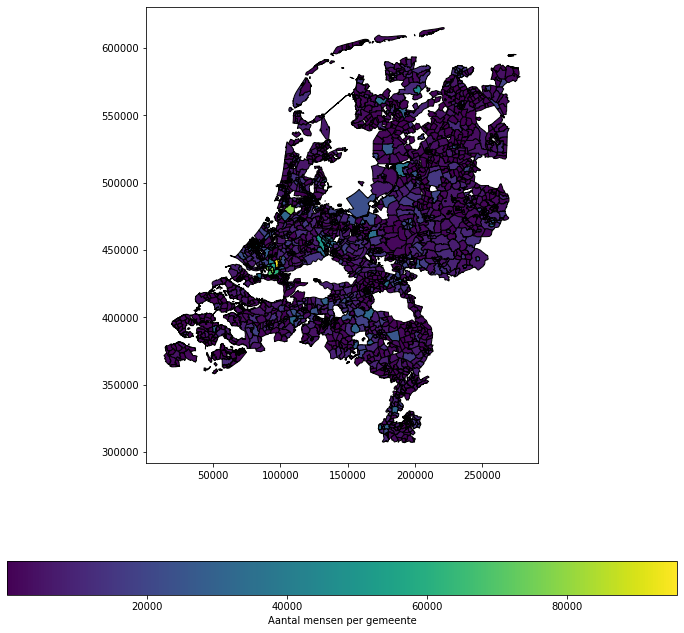

In [20]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (12,12))
gdf.plot(ax=ax, column="AANT_INW",legend=True, legend_kwds={"label": "Aantal mensen per gemeente", "orientation": "horizontal"}, edgecolor="black")
print(gdf[gdf.gemeentecode == 363].WK_NAAM)